In [2]:
import numpy as np
import pandas as pd
import pylab

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=12)
mpl.rc('xtick', labelsize=10)
mpl.rc('ytick', labelsize=10)

import seaborn as sns #sets up styles and gives us more plotting optionsimport numpy as np

In [3]:
data=pd.read_csv("logistic.csv", error_bad_lines=False) 

In [4]:
data.head(2)

,X1,X2,Y
0,4.855064,9.639962,1
1,8.625440,0.058927,0


In [5]:
# Sort Data  
#data=data.sort_values(by=['Y'])

In [6]:
x1 = data.X1.values
x2 = data.X2.values
y = data.Y.values

In [7]:
X12 = data[['X1','X2']]
x12 = X12.to_numpy()  # the same as  X12.values
x = np.hstack([np.ones((X12.shape[0], 1)), X12.values])

In [8]:
#Extract Trues/Falses (1s and 0s)
trues = data[data.Y.values == 1] # select rows where 3rd column is 1

falses = data[data.Y.values == 0]

#Extract Features and Labels
features = data[['X1','X2']].values
labels = data.Y.values
labels.shape = (len(features),1) 

In [9]:
def plot_scatter(trues,falses):
    fig = plt.figure()
    ax1 = fig.add_subplot(111)

    ax1.scatter(trues['X1'],trues['X2'], s=25, c='g', marker="o", label='Passed')
    ax1.scatter(falses['X1'],falses['X2'], s=25, c='r', marker="x", label='Failed')
    #ax1.plot([x for x in range(0,11,1)],[x for x in range(11,0,-1)], c='b')
    plt.legend(loc='upper right');
    ax1.set_xlabel('Hours Slept')
    ax1.set_ylabel('Hours Studied')
    #ax1.grid(True)
    fig.set_size_inches(10, 7) 
    #plot_decision_boundary()
    plt.show()

In [10]:
def plot_scatter1(trues,falses):
    fig = plt.figure()
    ax1 = fig.add_subplot(111)

    ax1.scatter(trues['X1'],trues['X2'], s=25, c='g', marker="o", label='Passed')
    ax1.scatter(falses['X1'],falses['X2'], s=25, c='r', marker="x", label='Failed')
    ax1.plot([x for x in range(0,11,1)],[x for x in range(11,0,-1)], c='b')  # guessed boundary 
    plt.legend(loc='upper right');
    ax1.set_xlabel('Hours Slept')
    ax1.set_ylabel('Hours Studied')
    #ax1.grid(True)
    fig.set_size_inches(10, 7) 
    #plot_decision_boundary()
    plt.show()

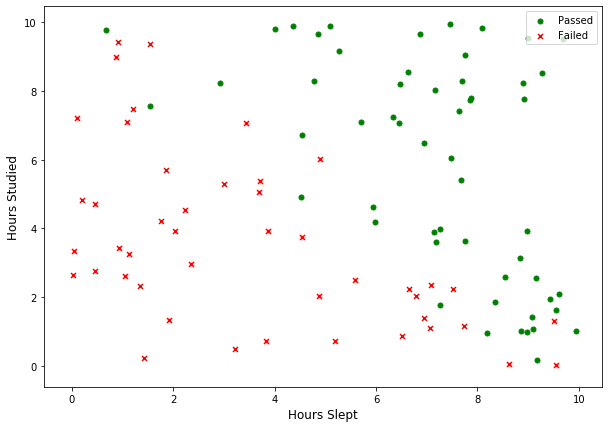

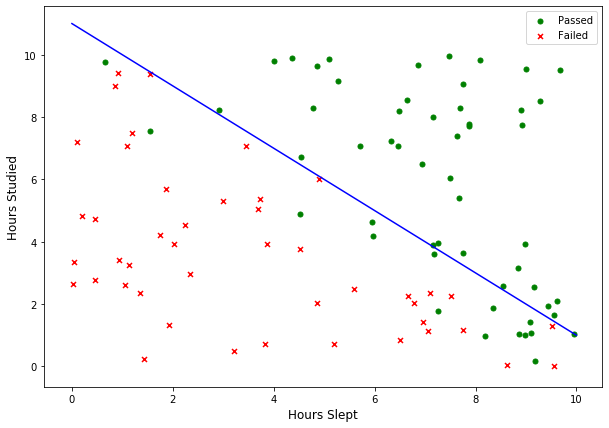

In [11]:
plot_scatter(trues,falses)
plot_scatter1(trues,falses)

In [12]:
def sigmoid(array): 
    return  1 / (1 + np.exp(-array))

In [13]:
# example = np.array([-2,-5,1,2,3,10])
# transformed = sigmoid(example)
# print(transformed)

<Figure size 648x432 with 0 Axes>

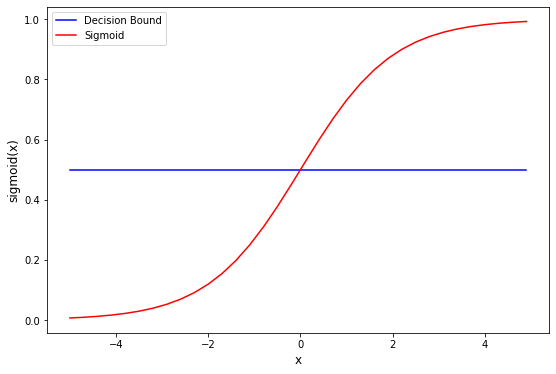

In [14]:
fig = plt.figure()
fig.set_size_inches(9, 6) 

values = np.arange(-5, 5, .3)
#print("Input Array ------")
#print(np.round(values,1))
#plt.plot(values)
#plt.show()


#fig = plt.figure()
#fig.set_size_inches(9, 6) 

#plt.plot([x for x in range(0,13,1)],[x for x in range(13,0,-1)])
#fig = plt.figure()
#fig.set_size_inches(9, 6) 
#plt.show()

fig = plt.figure()

sig = sigmoid(values)
#print("Sigmoid Tranformed -------")
#print(sig)
#plt.grid(True)
plt.plot(values, [.5 for i in range(len(values))],  c='b',label='Decision Bound')
plt.plot(values, sig, c='r', label='Sigmoid')
plt.xlabel('x')
plt.ylabel('sigmoid(x)')
plt.legend(loc='upper left');
fig.set_size_inches(9, 6) 
plt.show()

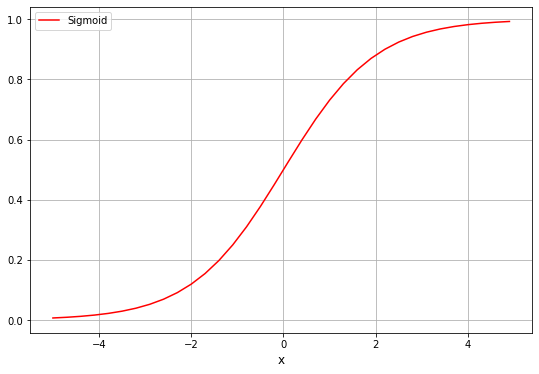

In [15]:
fig = plt.figure()
fig.set_size_inches(9, 6) 

values = np.arange(-5, 5, .3)

sig = sigmoid(values)
plt.grid(True)
plt.plot(values, sig, c='r', label='Sigmoid')
plt.xlabel('x')
#plt.ylabel('sigmoid(x)')
plt.legend(loc='upper left');

plt.show()

In [16]:
def sigmoid1(array): 
    return  1 / (1 + np.exp(10-2*array))

In [55]:
def plot_scatter_1(trues,falses):
    fig = plt.figure()
    ax1 = fig.add_subplot(111)

    ax1.scatter(trues['X1'],trues['Y'], s=25, c='g', marker="o", label='Passed')
    ax1.scatter(falses['X1'],falses['Y'], s=25, c='r', marker="x", label='Failed')
    plt.legend(loc='upper left');
    #ax1.set_xlabel('Hours Slept')
    #ax1.set_ylabel('Hours Studied') 
    #ax1.grid(True)
    values = np.arange(0, 10, .3)
    sig = sigmoid1(values)
    plt.grid(True)
    #plot_decision_boundary()  # guessed boundary
    plt.plot(values, sig, c='r', label='Sigmoid')
    plt.plot(np.array([5,5]), np.array([0,1]),  c='b',label='Decision Bound') 
    fig.set_size_inches(10, 7) 
    
    plt.show()

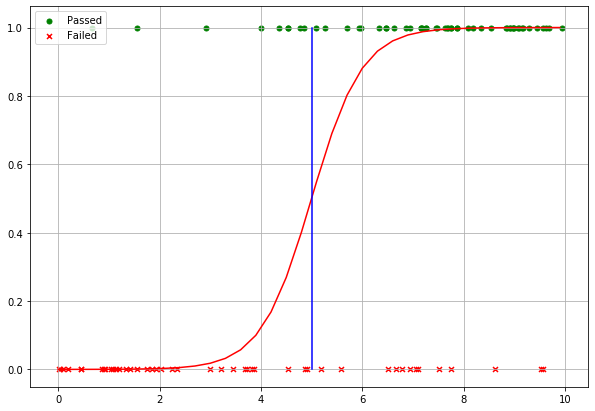

In [19]:
plot_scatter_1(trues,falses)

### From scretch:
Define our Sigmoid, Gradient, and Hessian functions:

In [20]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def grad_l(theta, x, y):
    z = y*x.dot(theta)
    g = -np.mean((1-sigmoid(z))*y*x.T, axis=1)
    return g

def hess_l(theta, x, y):
    hess = np.zeros((x.shape[1], x.shape[1]))
    z = y*x.dot(theta)
    for i in range(hess.shape[0]):
        for j in range(hess.shape[0]):
            if i <= j:
                hess[i][j] = np.mean(sigmoid(z)*(1-sigmoid(z))*x[:,i]*x[:,j])
                if i != j:
                    hess[j][i] = hess[i][j] 
    return hess

## Newton's method:

$$
\begin{align*}
    \theta := \theta - H^{-1} \nabla_{\theta} J(\theta)
\end{align*}
$$

In [21]:
def newton(theta0, x, y, G, H, eps):
    theta = theta0
    delta = 1
    while delta > eps:
        theta_prev = theta.copy()
        theta -= np.linalg.inv(H(theta, x, y)).dot(G(theta, x, y))
        delta = np.linalg.norm(theta-theta_prev, ord=1)
    return theta

In [22]:
data = data.assign(Y2=lambda f: f['Y'])
data.loc[lambda f: f['Y2']==0, 'Y2'] = -1

In [23]:
y = data.Y2.values

In [24]:
# Initialize theta0
theta0 = np.zeros(x.shape[1])

# Run Newton's method
theta_final = newton(theta0,x,y.T,grad_l,hess_l,1e-4)
print(theta_final)

[-16.1602695    1.74538164   1.48650834]


theta_final = newton(theta0,x,y.T,grad_l,hess_l,1e-6)
[-13.62872791   3.05307006   2.8937673 ]

In [25]:
#data["Y"] = pd.to_numeric(data["Y"],downcast='signed')
x1_vec = np.linspace(data["X1"].min(),data["X1"].max(),2);
x1_vec

array([0.02227957, 9.94784093])

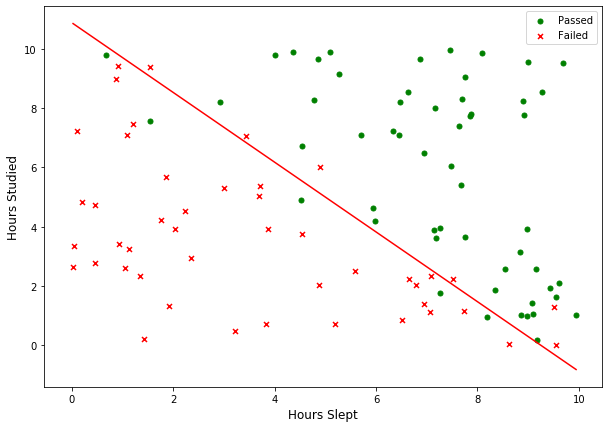

In [26]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(trues['X1'],trues['X2'], s=25, c='g', marker="o", label='Passed')
ax1.scatter(falses['X1'],falses['X2'], s=25, c='r', marker="x", label='Failed') 

plt.plot(x1_vec,(-x1_vec*theta_final[1]-theta_final[0])/theta_final[2], color="red"); #  Plot decision boundary


plt.legend(loc='upper right');
ax1.set_xlabel('Hours Slept')
ax1.set_ylabel('Hours Studied')
#ax1.grid(True)
fig.set_size_inches(10, 7) 
#plot_decision_boundary()
plt.show()

## sklearn.linear_model

In [28]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
logregfit=log_reg.fit(x12, y)

In [29]:
print(logregfit.coef_)
print(logregfit.intercept_)
print(logregfit.classes_)
print(logregfit.n_iter_)

[[1.40295843 1.17387611]]
[-12.89145197]
[-1  1]
[20]


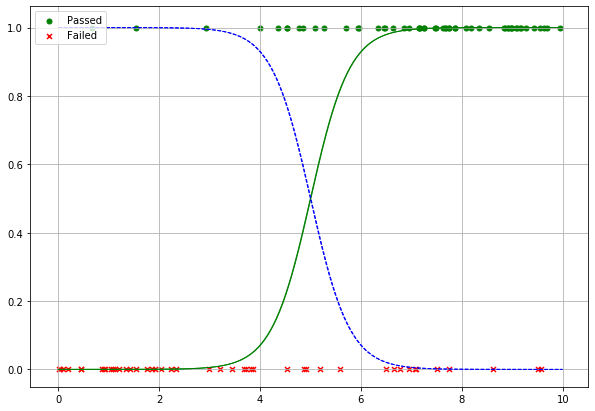

In [59]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(trues['X1'],trues['Y'], s=25, c='g', marker="o", label='Passed')
ax1.scatter(falses['X1'],falses['Y'], s=25, c='r', marker="x", label='Failed')
plt.legend(loc='upper left');

values = np.arange(0, 10, .3)
sig = sigmoid1(values)
plt.grid(True)
 
fig.set_size_inches(10, 7) 
#plot_decision_boundary()  
X_new = np.linspace(0, 10, 1000).reshape(500,2)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=1)
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=1)

plt.show()

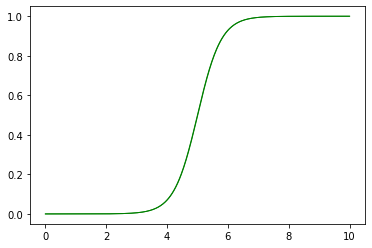

In [30]:
X_new = np.linspace(0, 10, 1000).reshape(500,2)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=1)
#plt.plot(X_new, y_proba[:, 0], "b--", linewidth=1)

In [44]:
xx = np.arange(0, 10, 0.25)
yy = np.arange(0, 10, 0.25)
X, Y = np.meshgrid(xx, yy)

xy = np.array([X.flatten(),Y.flatten()]).T  
y_pred = log_reg.predict_proba(xy) 

Z=log_reg.predict_proba(xy)[:, 1].reshape(xy[:, 0].shape[0],1)
xx.shape

(40,)

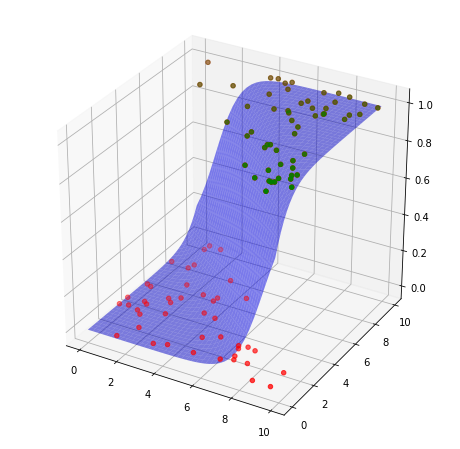

In [54]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm


ax1.scatter(trues['X1'],trues['X2'], s=25, c='g', marker="o", label='Passed')
ax1.scatter(falses['X1'],falses['X2'], s=25, c='r', marker="x", label='Failed') 


x1t = trues.X1.values
x2t = trues.X2.values
yt = trues.Y.values
x1f = falses.X1.values
x2f = falses.X2.values
yf = falses.Y.values
# list1 = np.linspace(0, 10, 40).tolist() 

# X_new =np.array([[a, b] for a in list1 
#           for b in list1]) 
 
xx = np.arange(0, 10, 0.25)
yy = np.arange(0, 10, 0.25)
X, Y = np.meshgrid(xx, yy)

xy = np.array([X.flatten(),Y.flatten()]).T  
y_pred = log_reg.predict_proba(xy) 

Z=log_reg.predict_proba(xy)[:, 1].reshape(xy[:, 0].shape[0],1).flatten().reshape(xx.shape[0],xx.shape[0])


fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
 
ax.scatter3D(x1, x2, y, zdir='z', c=None,s=20,cmap='red',color='red')

ax.scatter3D(x1t, x2t, yt, zdir='z', c=None,s=20,cmap='green',color='green')


# plot the plane
ax.plot_surface(X, Y, Z, alpha=0.5,color='blue')
 
    
plt.show()



# Softmax Regression (Multinomial Logistic Regression


In [60]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [62]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [64]:
#iris

In [65]:
X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris virginica, else 0

In [66]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

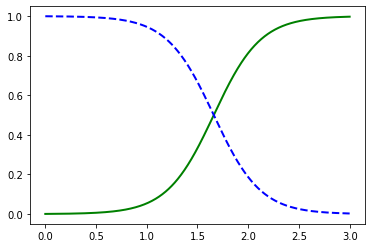

In [69]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")

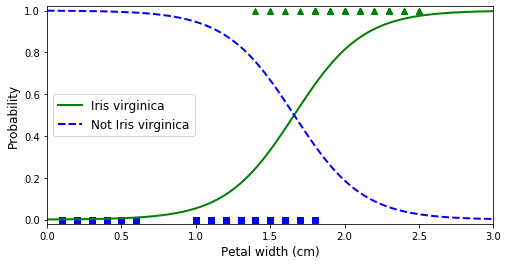

In [79]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 4))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
#plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
#plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
#plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
#plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=12)
plt.ylabel("Probability", fontsize=12)
plt.legend(loc="center left", fontsize=12)
plt.axis([0, 3, -0.02, 1.02])
#save_fig("logistic_regression_plot")
plt.show()

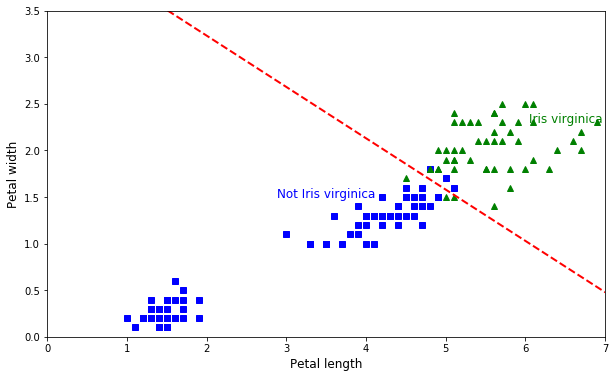

In [112]:
 from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(0, 7, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 6))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
#contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([0, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

#plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=2, color="r")
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=12, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=12, color="g", ha="center")
plt.xlabel("Petal length", fontsize=12)
plt.ylabel("Petal width", fontsize=12)
plt.axis([0, 7, 0, 3.5])
#save_fig("logistic_regression_contour_plot")
plt.show()

In [93]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

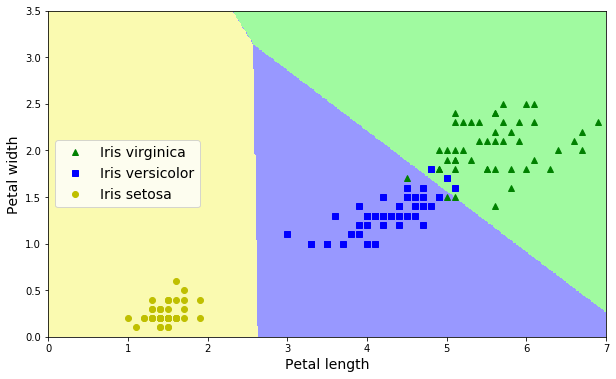

In [104]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 6))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
#contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5]) 
#save_fig("softmax_regression_contour_plot")
plt.show()

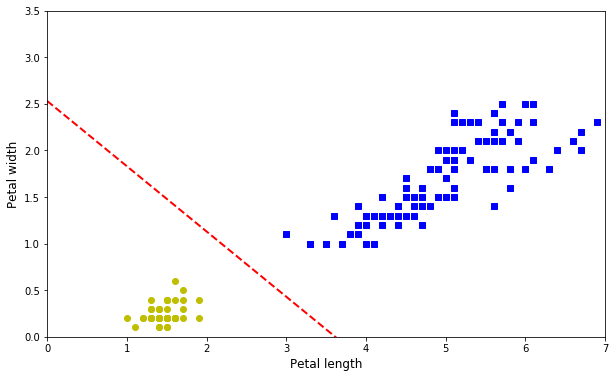

In [118]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 0).astype(np.int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(0, 7, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 6))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "yo")

zz = y_proba[:, 1].reshape(x0.shape)
#contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)


left_right = np.array([0, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

#plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=2, color="r")
#plt.text(3.5, 1.5, "Not Iris virginica", fontsize=12, color="b", ha="center")
#plt.text(6.5, 2.3, "Iris virginica", fontsize=12, color="g", ha="center")
plt.xlabel("Petal length", fontsize=12)
plt.ylabel("Petal width", fontsize=12)
plt.axis([0, 7, 0, 3.5])
#save_fig("logistic_regression_contour_plot")
plt.show()